## Texas Produced Water Dataset before the Permian Oil Shale Revolution (1920 - 2010)

The following code was implemented to clean the datasets obtained from the United States Geological Survey (USGS) National Produced Waters Database v2.3: https://energy.usgs.gov/EnvironmentalAspects/EnvironmentalAspectsofEnergyProductionandUse/ProducedWaters.aspx#3822349-data 

The major steps taken are to analyze and visualize the produced water data from the Texas well set. 

First the major libraries are imported, and the file read into a Pandas dataframe, df.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file = 'Texas Wells.xlsx'
df = pd.read_excel(file)

To fill in some of the missing data, I created two similar functions, as follows. In essence, the functions capture a list of rows with the missing attribute, and then search for their API numbers. A smaller dataframe with similar API numbers is then created. The first function fills in the missing latitudes and longitudes by copying these data from the rows where it is given. The second function fills in the missing upper depth and lower depth values by taking the average of the rows where it is given. The return values are the total number of data points that have been changed. 

Next, to analyze the data contained within this huge dataset, one can use the .info() and .head() method.

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19388 entries, 0 to 19387
Columns: 190 entries, IDUSGS to cull_chargeb
dtypes: float64(104), int64(2), object(84)
memory usage: 28.1+ MB


,IDUSGS,IDORIG,IDDB,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LATLONGAPX,API,USGSREGION,...,Sr87Sr86,I129,Rn222,Ra226,Ra228,cull_PH,cull_MgCa,cull_KCl,cull_K5Na,cull_chargeb
0,177,14-TX-01B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.90,-101.44,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.71744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,178,14-TX-02B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.91,-101.44,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.70920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,179,14-TX-03B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.86,-101.47,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.70891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,180,14-TX-04B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.99,-101.49,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.70912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
4,181,14-TX-05B,PERMIANENGLE,"Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...","Engle, M.A., Reyes, F.R., Varonka, M.S., Orem,...",31.98,-101.49,Latitude and Longitude are approximate.,NaN,West Texas and Eastern New Mexico,...,0.71780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there are 190 columns and 19388 entries, some data cleaning needs to be implemented. There are multiple columns in the dataset that are empty, and so the first step is to remove them, and add them to a new dataframe, df_drop. 

In [6]:
# deleting columns that are null values
df_drop = df.dropna(axis= 1, how='all')

print(df.info())
print(df_drop.info())

# number of attributes dropped to 129 from 190

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19388 entries, 0 to 19387
Columns: 190 entries, IDUSGS to cull_chargeb
dtypes: float64(104), int64(2), object(84)
memory usage: 28.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19388 entries, 0 to 19387
Columns: 129 entries, IDUSGS to cull_chargeb
dtypes: float64(43), int64(2), object(84)
memory usage: 19.1+ MB
None


I then cleaned up the data by focusing only on the main parameters of interest, i.e. 'LATITUDE', 'LONGITUDE', 'API', 'USREGION', 'BASIN', 'COUNTY', 'WELLNAME', 'WELLTYPE', 'DATECOMP', 'DATESAMPLE', 'FORMATION', 'PERIOD', 'DEPTHUPPER', 'DEPTHLOWER', 'DEPTHWELL', 'SPGRAV', 'PH', 'TDSUSGS', 'HCO3', 'Ca', 'Cl', 'KNa', 'Mg', 'Na', 'SO4', 'H2S', 'cull_chargeb'. 

In [7]:
# selecting known wells with API numbers
df_drop = df_drop[['LATITUDE','LONGITUDE','API','BASIN','COUNTY','WELLNAME','WELLTYPE','DATECOMP','DATESAMPLE','FORMATION','PERIOD','DEPTHUPPER','DEPTHLOWER','DEPTHWELL','SPGRAV','PH','TDSUSGS','HCO3','Ca','Cl','KNa','Mg','Na','SO4','H2S','cull_chargeb']]      
df_drop.head()

,LATITUDE,LONGITUDE,API,BASIN,COUNTY,WELLNAME,WELLTYPE,DATECOMP,DATESAMPLE,FORMATION,...,TDSUSGS,HCO3,Ca,Cl,KNa,Mg,Na,SO4,H2S,cull_chargeb
0,31.90,-101.44,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaN,2014-01-23,Fusselman,...,69000.0,NaN,2190,39800,NaN,403,22200,1580,NaN,NaN
1,31.91,-101.44,NaN,Permian,Glasscock,NaN,Tight Oil,NaN,2014-01-23,Cline Shale,...,79900.0,NaN,2450,46300,NaN,329,25200,351,NaN,NaN
2,31.86,-101.47,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaN,2014-01-23,Wolfwood (Wolfcamp/Woodford),...,127000.0,NaN,8010,75100,NaN,1130,36800,304,NaN,NaN
3,31.99,-101.49,NaN,Permian,Glasscock,NaN,Tight Oil,NaN,2014-01-23,Cline Shale,...,37700.0,NaN,572,13400,NaN,78.2,12900,<300,NaN,X
4,31.98,-101.49,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaN,2014-01-23,Fusselman,...,72400.0,NaN,2470,40900,NaN,474,22700,1530,NaN,NaN


Thus the final number of parameters fell down to 26. I also converted dates to datetime format. 

In [8]:
# converting dates to datetime
df_drop.DATECOMP = pd.to_datetime(df_drop.DATECOMP)
df_drop.DATESAMPLE = pd.to_datetime(df_drop.DATESAMPLE)

print(df_drop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19388 entries, 0 to 19387
Data columns (total 26 columns):
LATITUDE        16631 non-null float64
LONGITUDE       16635 non-null float64
API             8208 non-null float64
BASIN           19388 non-null object
COUNTY          19317 non-null object
WELLNAME        19087 non-null object
WELLTYPE        19388 non-null object
DATECOMP        1648 non-null datetime64[ns]
DATESAMPLE      16734 non-null datetime64[ns]
FORMATION       19388 non-null object
PERIOD          19388 non-null object
DEPTHUPPER      13614 non-null float64
DEPTHLOWER      11050 non-null float64
DEPTHWELL       9276 non-null float64
SPGRAV          16943 non-null object
PH              16406 non-null object
TDSUSGS         19373 non-null float64
HCO3            18664 non-null object
Ca              19366 non-null object
Cl              19375 non-null object
KNa             2345 non-null object
Mg              19358 non-null object
Na              17037 non-null objec

In [9]:
#Analyzing the lat and long data
print('Null values for the Latitude: ' + str(df_drop.LATITUDE.isnull().sum()))
print('Null values for the Longitude: ' + str(df_drop.LONGITUDE.isnull().sum()))

Null values for the Latitude: 2757
Null values for the Longitude: 2753


In [10]:
#Dropped the empty lat/lon values
df_drop = df_drop[df_drop.LATITUDE.notnull()]
df_drop = df_drop[df_drop.LONGITUDE.notnull()]
df_drop.head()

,LATITUDE,LONGITUDE,API,BASIN,COUNTY,WELLNAME,WELLTYPE,DATECOMP,DATESAMPLE,FORMATION,...,TDSUSGS,HCO3,Ca,Cl,KNa,Mg,Na,SO4,H2S,cull_chargeb
0,31.90,-101.44,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Fusselman,...,69000.0,NaN,2190,39800,NaN,403,22200,1580,NaN,NaN
1,31.91,-101.44,NaN,Permian,Glasscock,NaN,Tight Oil,NaT,2014-01-23,Cline Shale,...,79900.0,NaN,2450,46300,NaN,329,25200,351,NaN,NaN
2,31.86,-101.47,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Wolfwood (Wolfcamp/Woodford),...,127000.0,NaN,8010,75100,NaN,1130,36800,304,NaN,NaN
3,31.99,-101.49,NaN,Permian,Glasscock,NaN,Tight Oil,NaT,2014-01-23,Cline Shale,...,37700.0,NaN,572,13400,NaN,78.2,12900,<300,NaN,X
4,31.98,-101.49,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Fusselman,...,72400.0,NaN,2470,40900,NaN,474,22700,1530,NaN,NaN


In [11]:
column = 'DEPTHUPPER'
col_missing = df_drop[df_drop[column].isnull()].reset_index() 
slices_last = pd.DataFrame()
filled_depths = []            #list of dataframes with each entry = one well 

for i in range(len(col_missing)):         #len(col_missing
    
    slices = df_drop[df_drop.LATITUDE.isin([col_missing.LATITUDE[i]]) & df_drop.LONGITUDE.isin([col_missing.LONGITUDE[i]])]
    slices = slices.sort_values(by=[column]).reset_index()
    
    if i == 0:
        #initializing value of slices_last 
        slices_last = slices
        
    if slices.LATITUDE[0] != slices_last.LATITUDE[0]:             # and len(slices) != 1
        #to make sure that repeats are not found, and that the unique (single) wells are not returned
        
        #print('index: ' + str(i), slices[['LATITUDE','LONGITUDE','WELLNAME','DEPTHUPPER','DEPTHLOWER']])
        
        if pd.notnull(slices[column]).any(): 
        
            mean = slices[column].mean() 
            
            #if the block of wells with this particular lat/long have any of depths
            #filled in, then fill the NaNs with the means of those depths
            
            if np.std(slices[column]) <= 400:
                #Check for not naming different levels of the well section accidentally, and be restricted to 
                #one formation only
                
                slices.fillna({column:mean}, inplace=True)
                filled_depths.append(slices)
                #null_slice = slices[slices.DEPTHUPPER.isnull()]
                #test = df_drop.column.replace(null_slice.column,mean, inplace=True)
                #inds = slices['index']
                #df_drop_c.loc[inds,column] = df_drop_c.loc[inds,column].fillna(mean, inplace=True)
                #print('index: ' + str(i), slices[['LATITUDE','LONGITUDE','WELLNAME','DEPTHUPPER','DEPTHLOWER']])
                
        else:
            filled_depths.append(slices)
                
    slices_last = slices
    

The list <i>filled_depths </i>now contains dataframes of the same wellname, filled with depth values interpolated from previous entries. This would need to be converted into a dataframe. 

In [12]:
df_clean = pd.concat(filled_depths).reset_index(drop=True)

In [13]:
len(df_drop)

16631

In [14]:
len(df_clean)

14628

In [15]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16631 entries, 0 to 19386
Data columns (total 26 columns):
LATITUDE        16631 non-null float64
LONGITUDE       16631 non-null float64
API             8172 non-null float64
BASIN           16631 non-null object
COUNTY          16622 non-null object
WELLNAME        16399 non-null object
WELLTYPE        16631 non-null object
DATECOMP        1648 non-null datetime64[ns]
DATESAMPLE      14255 non-null datetime64[ns]
FORMATION       16631 non-null object
PERIOD          16631 non-null object
DEPTHUPPER      11685 non-null float64
DEPTHLOWER      9702 non-null float64
DEPTHWELL       8843 non-null float64
SPGRAV          14364 non-null object
PH              14227 non-null object
TDSUSGS         16619 non-null float64
HCO3            15967 non-null object
Ca              16613 non-null object
Cl              16618 non-null object
KNa             1850 non-null object
Mg              16605 non-null object
Na              14777 non-null object

In [16]:
permian = df_drop[df_drop.BASIN == 'Permian']
amarillo = df_drop[df_drop.BASIN == 'Amarillo Arch']
anadarko = df_drop[df_drop.BASIN == 'Anadarko']
eastTexas = df_drop[df_drop.BASIN == 'East Texas']
gulf_coast = df_drop[df_drop.BASIN == 'Gulf Coast']
basins = [permian, amarillo,anadarko,eastTexas,gulf_coast]
basin_names = ['Permian','Amarillo','Anadarko','East Texas','Gulf Coast']

### Exploratory Data Analysis

In [17]:
permian.head(20)

,LATITUDE,LONGITUDE,API,BASIN,COUNTY,WELLNAME,WELLTYPE,DATECOMP,DATESAMPLE,FORMATION,...,TDSUSGS,HCO3,Ca,Cl,KNa,Mg,Na,SO4,H2S,cull_chargeb
0,31.90,-101.44,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Fusselman,...,69000.0,NaN,2190,39800,NaN,403,22200,1580,NaN,NaN
1,31.91,-101.44,NaN,Permian,Glasscock,NaN,Tight Oil,NaT,2014-01-23,Cline Shale,...,79900.0,NaN,2450,46300,NaN,329,25200,351,NaN,NaN
2,31.86,-101.47,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Wolfwood (Wolfcamp/Woodford),...,127000.0,NaN,8010,75100,NaN,1130,36800,304,NaN,NaN
3,31.99,-101.49,NaN,Permian,Glasscock,NaN,Tight Oil,NaT,2014-01-23,Cline Shale,...,37700.0,NaN,572,13400,NaN,78.2,12900,<300,NaN,X
4,31.98,-101.49,NaN,Permian,Glasscock,NaN,Conventional Hydrocarbon,NaT,2014-01-23,Fusselman,...,72400.0,NaN,2470,40900,NaN,474,22700,1530,NaN,NaN
5,31.97,-101.48,NaN,Permian,Glasscock,NaN,Tight Oil,NaT,2014-01-23,Cline Shale,...,36800.0,NaN,569,21000,NaN,79.3,13000,<300,NaN,NaN
6,31.49,-101.64,NaN,Permian,Reagan,NaN,Conventional Hydrocarbon,NaT,2014-01-24,Spraberry,...,138000.0,NaN,1440,82400,NaN,370,47400,<300,NaN,NaN
7,31.48,-101.65,NaN,Permian,Reagan,NaN,Conventional Hydrocarbon,NaT,2014-01-24,Spraberry,...,139000.0,NaN,1470,83300,NaN,345,48100,<300,NaN,NaN
8,31.51,-101.66,NaN,Permian,Reagan,NaN,Conventional Hydrocarbon,NaT,2014-01-24,Dean,...,118000.0,NaN,1650,71200,NaN,317,39600,<300,NaN,NaN
9,31.57,-101.92,NaN,Permian,Upton,NaN,Tight Oil,NaT,2014-01-24,Wolfcamp Shale,...,149000.0,NaN,3150,90400,NaN,445,50000,368,NaN,NaN


In [18]:
# Number of observations taken per major basin around Texas (could be from same well on same day, but different formation)
basin_tds_count = df_drop.groupby('BASIN')['TDSUSGS'].count()
basin_tds_count

BASIN
Amarillo Arch           181
Anadarko                349
Bend Arch                82
East Texas             1710
Fort Worth               84
Gulf Coast             6762
Kerr                      4
Llano Uplift             40
Ouachita Thrust          15
Palo Duro               113
Permian                7135
Permian - Bend Arch       1
Southern Oklahoma       142
Strawn                    1
Name: TDSUSGS, dtype: int64

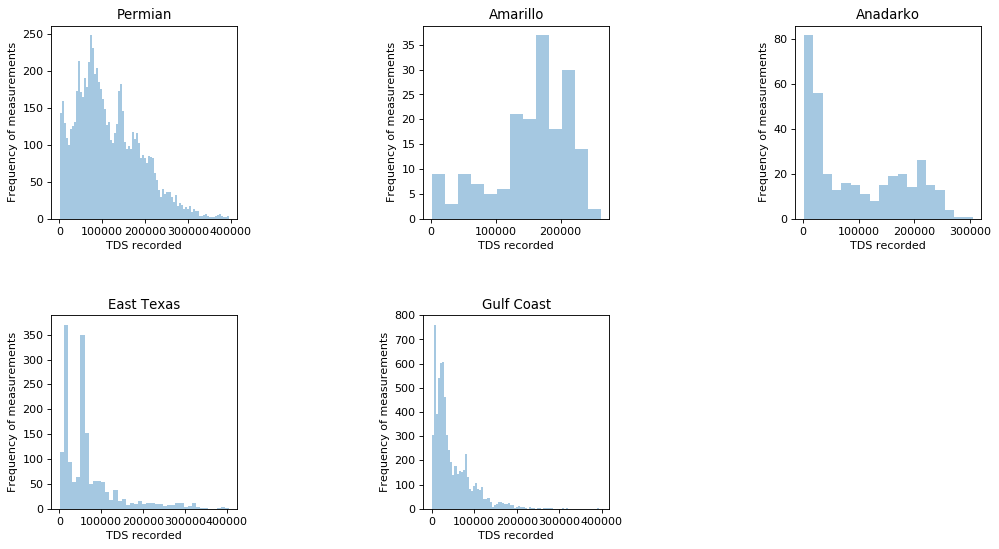

In [20]:
#Distribution of TDS counts in different basins throughout Texas (depiction of basin_tds_count)
fig = plt.figure(num=1, figsize=(17, 8), dpi=80, facecolor='w', edgecolor='k')
#fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=1)

for i in range(1,6):

    ax = fig.add_subplot(2,3,i)
    ax.hist(basins[i-1].TDSUSGS, bins=int(np.sqrt(len(basins[i-1]))),alpha=0.4)
    #axs[i].hist(basins[i].TDSUSGS, bins=int(np.sqrt(len(basins[i]))),alpha=0.4)
    fig.set_figwidth(15)
    ax.set_title(basin_names[i-1]) 
    ax.set_xlabel('TDS recorded')
    ax.set_ylabel('Frequency of measurements')

In [21]:
#Basin versus median TDS - Boxplot
basin_tds_avg = df_drop.groupby('BASIN')['TDSUSGS'].median().reset_index()
basin_tds_avg

,BASIN,TDSUSGS
0,Amarillo Arch,167090.0
1,Anadarko,71249.0
2,Bend Arch,124996.0
3,East Texas,55800.0
4,Fort Worth,205267.0
5,Gulf Coast,30924.0
6,Kerr,3072.5
7,Llano Uplift,66331.5
8,Ouachita Thrust,4531.0
9,Palo Duro,141291.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

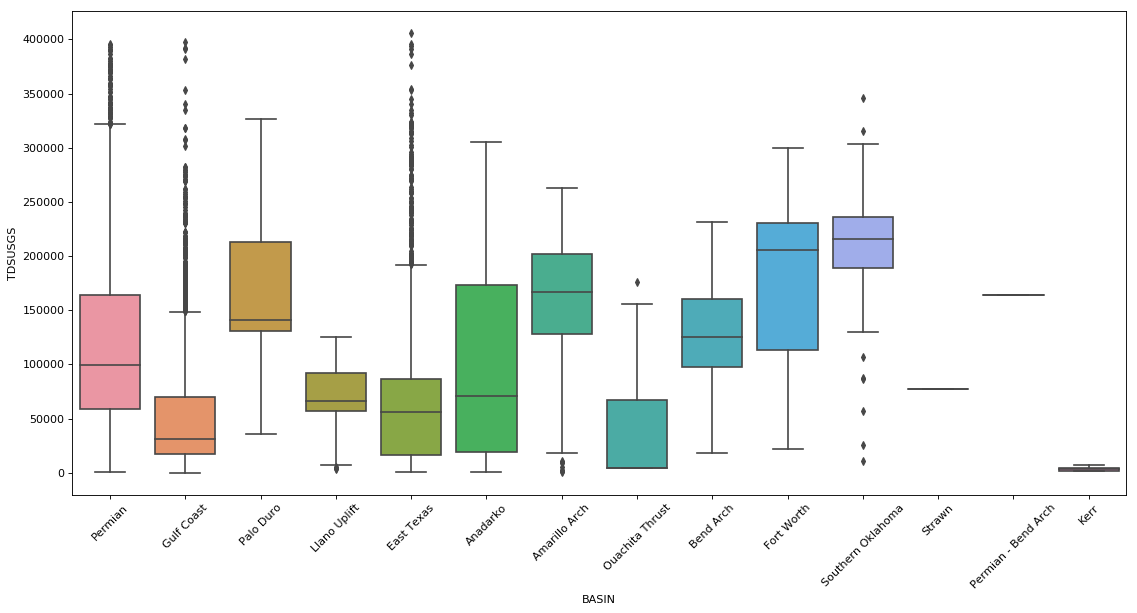

In [22]:
fig = plt.figure(num=2, figsize=(17, 8), dpi=80, facecolor='w', edgecolor='none')
ax = sns.boxplot(x='BASIN', y='TDSUSGS',data=df_drop)
plt.xticks(rotation = 45)

In [23]:
# Analysis of Period and Basin with Depths
basin_period_depth = df_clean.groupby(['BASIN','PERIOD'])['DEPTHUPPER'].mean().reset_index()
print(basin_period_depth)

for i in range(len(basin_period_depth)):
    if basin_period_depth.PERIOD[i] == 'Unknown':
        basin_period_depth.drop(i,axis=0, inplace=True)
        
print(basin_period_depth)

                  BASIN                                             PERIOD  \
0         Amarillo Arch                                            Unknown   
1              Anadarko                                      Mississippian   
2              Anadarko                                         Ordovician   
3              Anadarko                                      Pennsylvanian   
4              Anadarko                                            Unknown   
5             Bend Arch                                            Unknown   
6            East Texas                                         Cretaceous   
7            East Texas                                           Jurassic   
8            East Texas                                            Unknown   
9            Fort Worth                                            Unknown   
10           Gulf Coast                                         Cretaceous   
11           Gulf Coast                                         

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

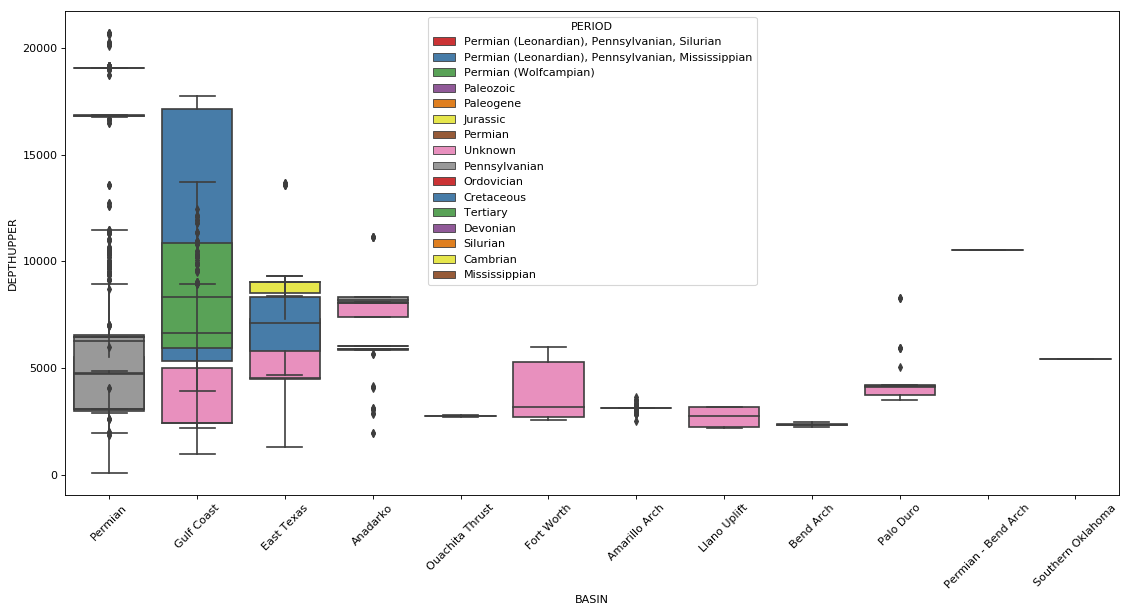

In [47]:
fig = plt.figure(num=3, figsize=(17, 8), dpi=80, facecolor='w', edgecolor='none')

ax = sns.boxplot(x='BASIN', y='DEPTHUPPER',data=df_clean, hue='PERIOD', palette='Set1', dodge=False)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

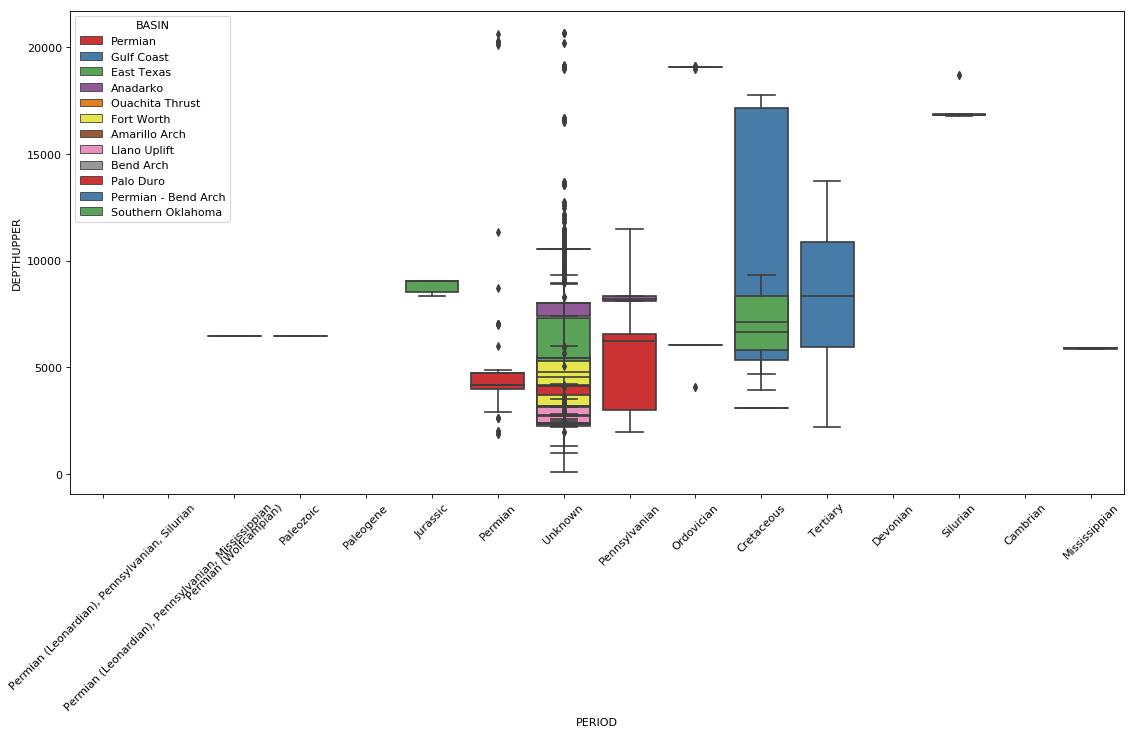

In [48]:
fig = plt.figure(num=4, figsize=(17, 8), dpi=80, facecolor='w', edgecolor='none')

ax = sns.boxplot(x='PERIOD', y='DEPTHUPPER',data=df_clean, hue='BASIN', palette='Set1', dodge=False)
plt.xticks(rotation = 45)

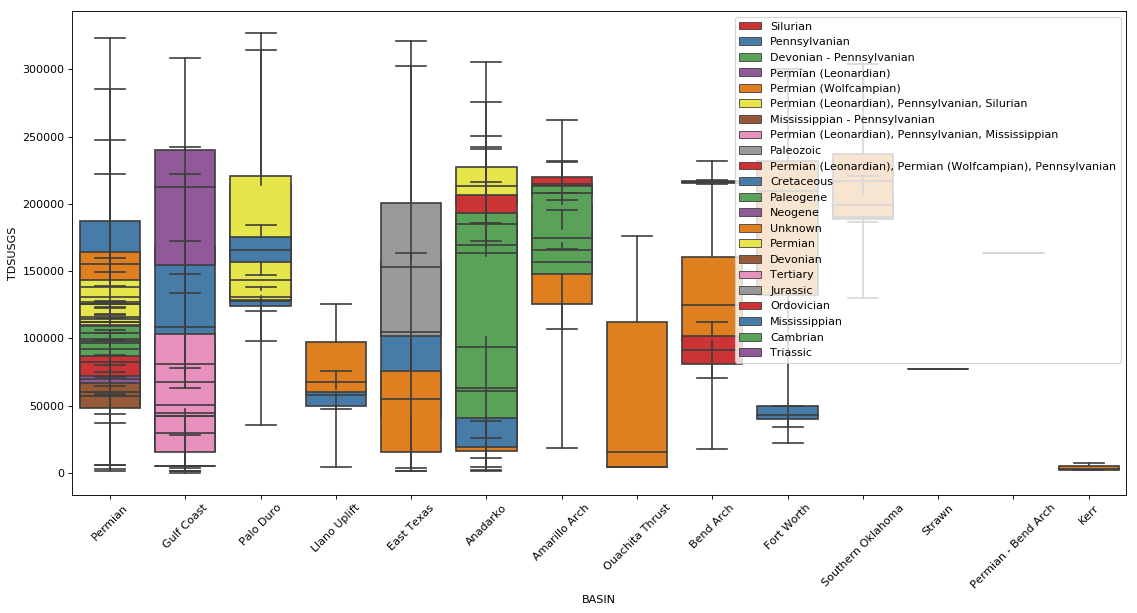

In [60]:
fig = plt.figure(num=5, figsize=(17, 8), dpi=80, facecolor='w', edgecolor='none')

ax = sns.boxplot(x='BASIN', y='TDSUSGS',data=df_drop, hue='PERIOD', palette='Set1', dodge=False, showfliers=False)
plt.xticks(rotation = 45)
plt.legend(loc='best')

In [ ]:
#Basin Depthrange vs TDS


In [385]:
df_clean.groupby('BASIN')['DEPTHUPPER','TDSUSGS'].count()

,DEPTHUPPER,TDSUSGS
BASIN,,
Amarillo Arch,931,936
Anadarko,65,76
Bend Arch,8,15
East Texas,4084,4150
Fort Worth,6,13
Gulf Coast,4807,5253
Llano Uplift,6,15
Ouachita Thrust,5,6
Palo Duro,38,39


In [383]:
df_drop.groupby('BASIN')['DEPTHUPPER','TDSUSGS'].count()

,DEPTHUPPER,TDSUSGS
BASIN,,
Amarillo Arch,68,181
Anadarko,280,349
Bend Arch,71,82
East Texas,706,1710
Fort Worth,73,84
Gulf Coast,5237,6762
Kerr,4,4
Llano Uplift,29,40
Ouachita Thrust,13,15


Regarding both tables for depths, I will use df_clean for Gulf coast, Permian, East Texas and Amarillo Arch, and will use df_drop for Anadarko 

In [386]:
permian_depth = df_clean[df_clean.BASIN == 'Permian']
amarillo_depth = df_clean[df_clean.BASIN == 'Amarillo Arch']
anadarko_depth = df_drop[df_drop.BASIN == 'Anadarko']
eastTexas_depth = df_clean[df_clean.BASIN == 'East Texas']
gulf_coast_depth = df_clean[df_clean.BASIN == 'Gulf Coast']
basins_depth = [permian_depth, amarillo_depth,anadarko_depth,eastTexas_depth,gulf_coast_depth]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


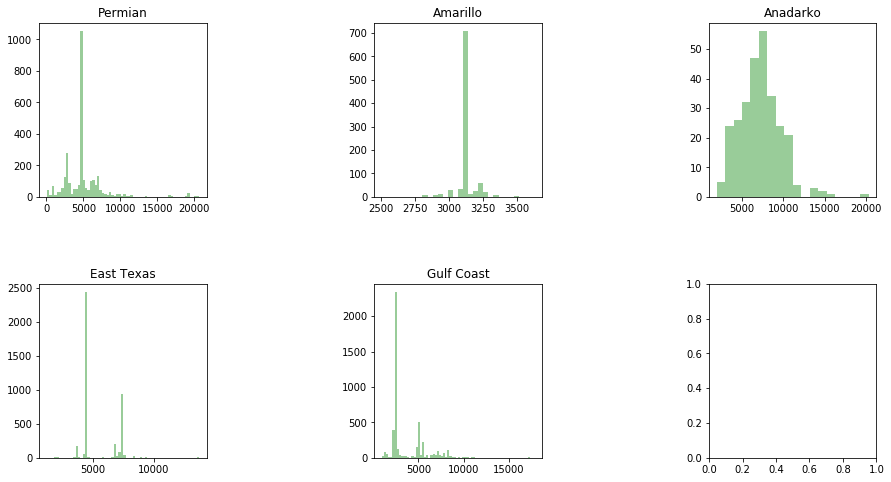

In [390]:
#Distribution of depths in different basins throughout Texas
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=1)

axs = axs.ravel()

for i in range(5):

    axs[i].hist(basins_depth[i].DEPTHUPPER, bins=int(np.sqrt(len(basins_depth[i]))),alpha=0.4,color='g')
    axs[i].set_title(basin_names[i])

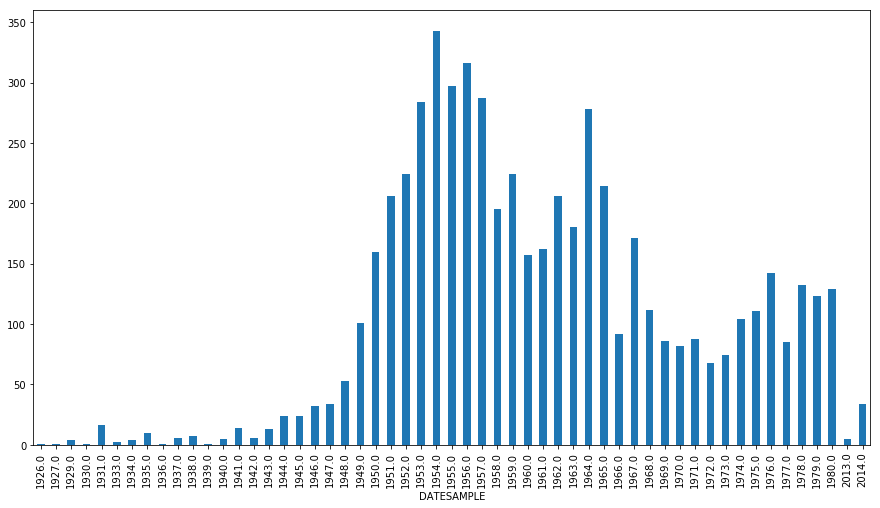

In [420]:
plt.figure(figsize=(15, 8), facecolor='w', edgecolor='k')
_ = permian.groupby(permian["DATESAMPLE"].dt.year)['TDSUSGS'].count().plot(kind='bar')
#_ = permian.groupby(permian["DATESAMPLE"].dt.year)['TDSUSGS'].mean().plot(color='r',alpha=0.5)

In [345]:
#EDA
# geo comparisons of well depths upper, lower and point depths (mean, std, count)
depth_geo = df_clean.groupby(['LATITUDE','LONGITUDE'])['DEPTHUPPER','DEPTHLOWER','DEPTHWELL'].agg(['mean','std','count']).reset_index()
depth_geo.columns = depth_geo.columns.droplevel()
depth_geo.columns = ['LATITUDE','LONGITUDE','DUmean','DUstd','DUcount','DLmean','DLstd','DLcount','Dmean','Dstd','Dcount']
depth_geo

,LATITUDE,LONGITUDE,DUmean,DUstd,DUcount,DLmean,DLstd,DLcount,Dmean,Dstd,Dcount
0,26.10700,-98.18600,6979.600000,372.217782,27,6958.521739,374.984469,23,7416.277778,370.774199,18
1,26.11160,-98.01510,NaN,NaN,0,NaN,NaN,0,9200.000000,NaN,1
2,26.12210,-98.00940,NaN,NaN,0,NaN,NaN,0,9003.000000,NaN,1
3,26.37510,-98.60280,NaN,NaN,0,NaN,NaN,0,4617.000000,NaN,1
4,26.39080,-98.62630,3778.000000,0.000000,2,3782.000000,NaN,1,4172.000000,0.000000,2
5,26.41800,-97.57540,NaN,NaN,0,NaN,NaN,0,7976.000000,NaN,1
6,26.41920,-97.57420,NaN,NaN,0,NaN,NaN,0,7984.000000,NaN,1
7,26.41980,-97.57240,NaN,NaN,0,NaN,NaN,0,8000.000000,NaN,1
8,26.42080,-97.57720,NaN,NaN,0,NaN,NaN,0,7970.000000,NaN,1
9,26.42100,-97.57050,NaN,NaN,0,NaN,NaN,0,7978.000000,NaN,1


In [313]:
extra_wells = []
for ind in df_drop.index:
    if not df_clean['index'].isin([ind]).any():
        extra_wells.append(df_drop.loc[ind,:])
    
    if ind == 50:
        break

Using this initial data, I was able to plot the latitude, longitude and depths on a 3D map, as follows:

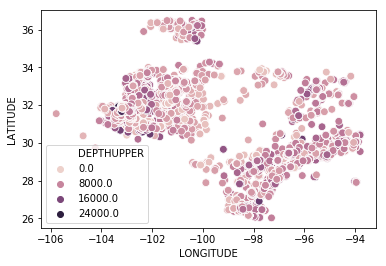

In [78]:

fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x=APIm.LONGITUDE, y=APIm.LATITUDE, hue=APIm.DEPTHUPPER, cmap='red',s=60)

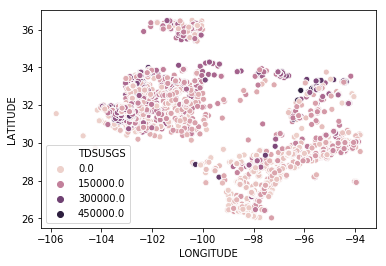

In [84]:
plt.figure()
sns.scatterplot(x=APIm.LONGITUDE, y=APIm.LATITUDE, hue=APIm.TDSUSGS, color='blue')

In [7]:
formations = []
for formation in df_drop['FORMATION']:
    if not formation in formations:
        formations.append(formation)
        
print(formations[:20])

['Fusselman', 'Cline Shale', 'Wolfwood (Wolfcamp/Woodford)', 'Spraberry', 'Dean', 'Wolfcamp Shale', 'Spraberry, Strawn, Fusselman', 'Otoka/Barnett Shale', 'Strawn, Atoka, Mississipain Lime, Spraberry', 'Strawn, Atoka, Spraberry', 'Multiple Reservoirs', 'Spraberry, Wolfcamp, and Pennsylvanian', 'Edwards', 'Frio', 'Hosston / Cotton Valley', 'Miocene', 'Vicksburg', 'Wilcox', 'Austin Chalk', 'Frio A']
